# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [367]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

решение будет на листке в формате jpg или pdf

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

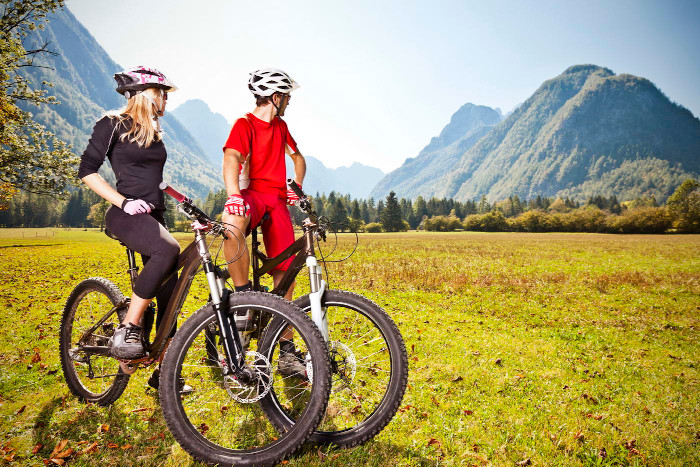

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [336]:
data = pd.read_csv("day.csv")
train_data, test_data = train_test_split(data, test_size=0.2, random_state=11)


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

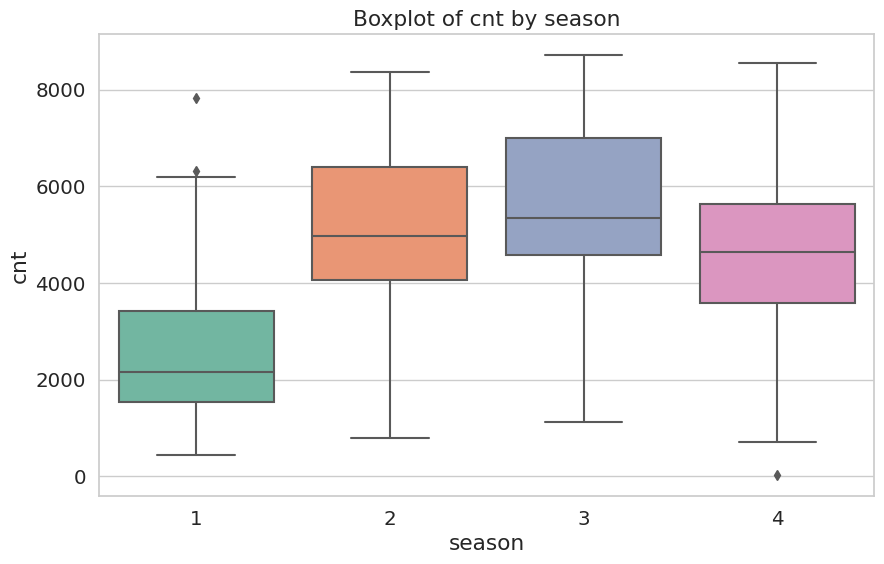

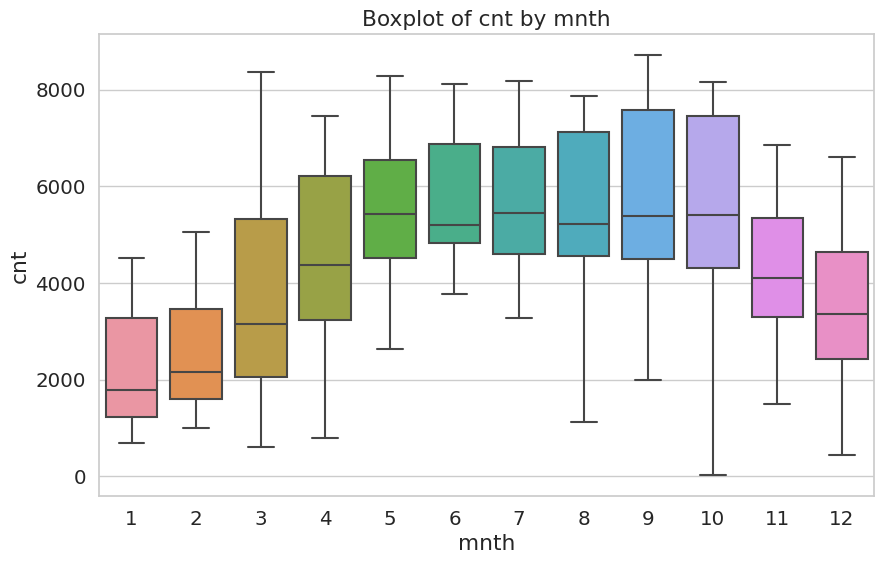

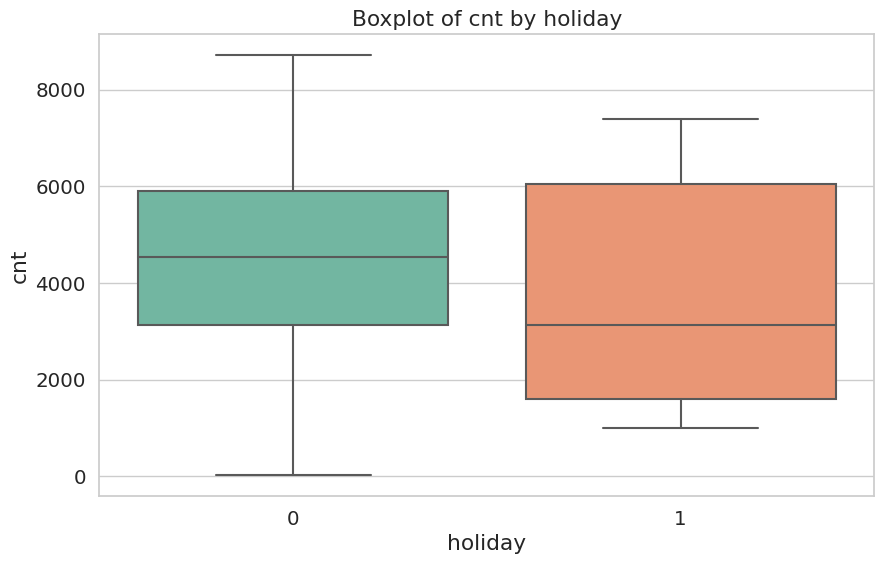

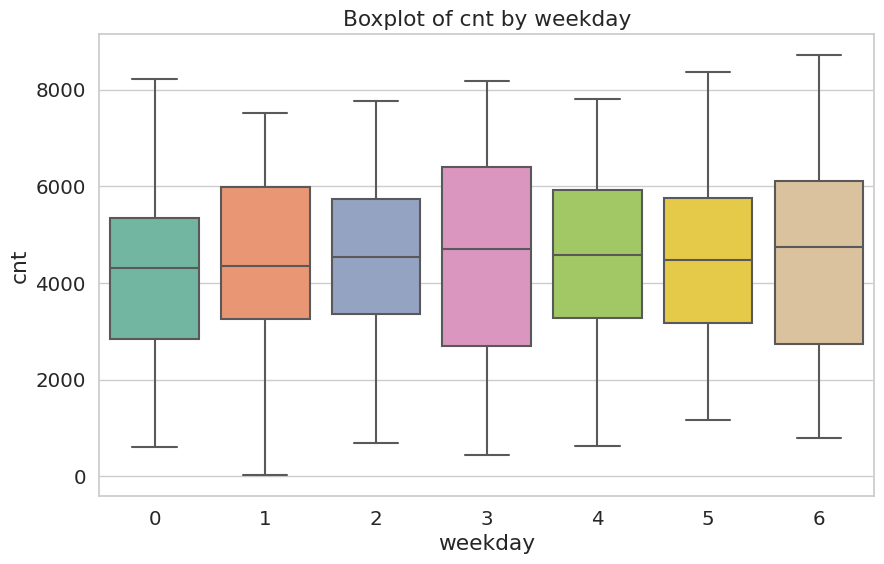

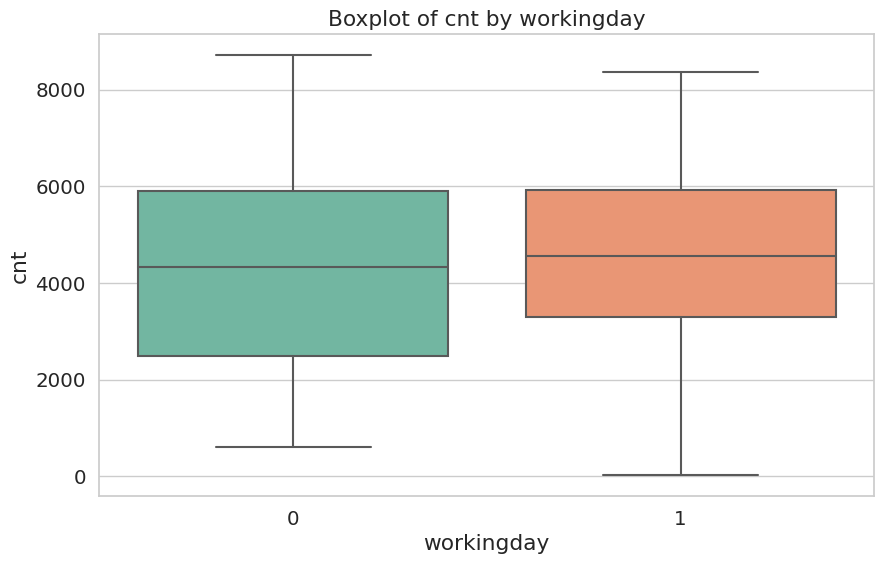

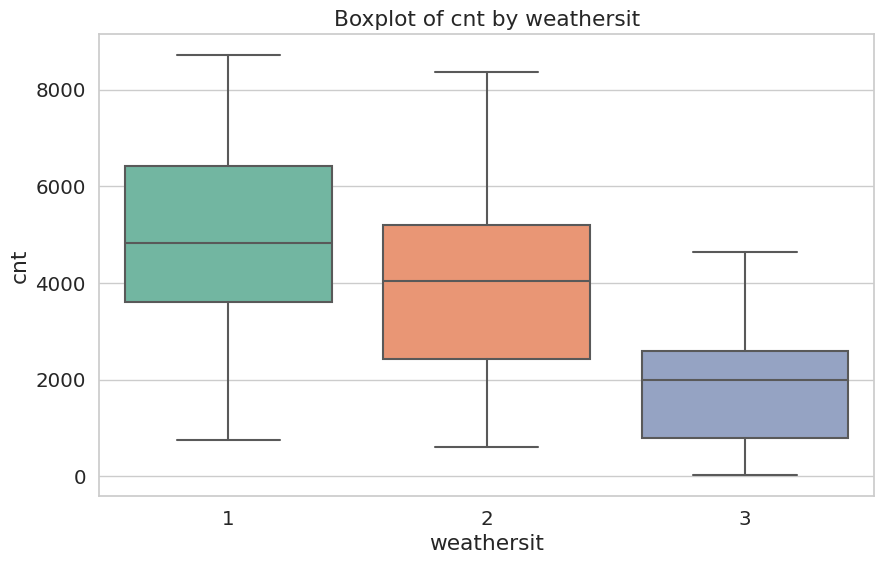

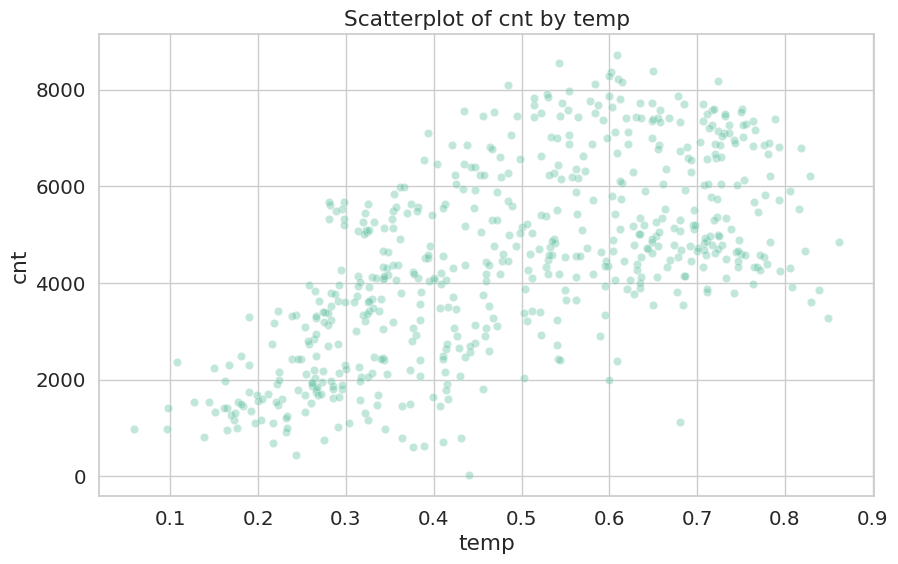

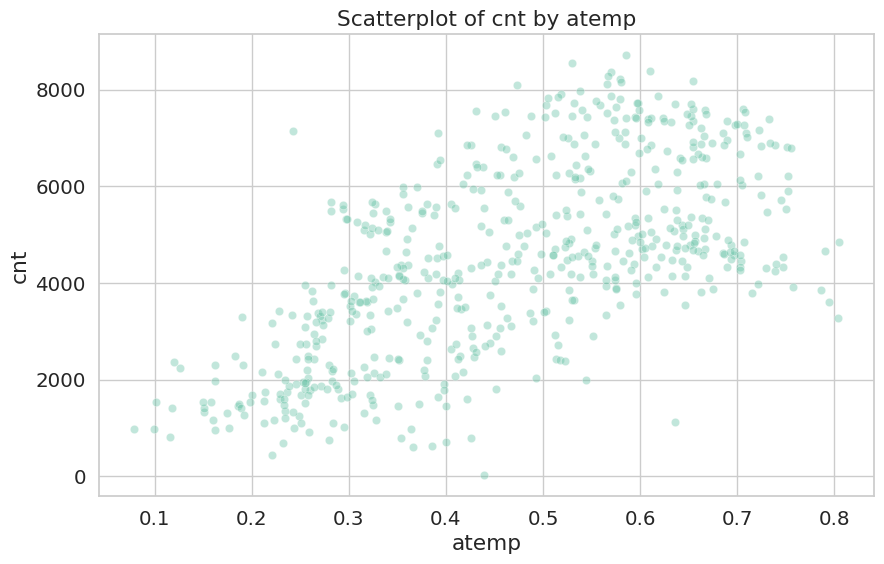

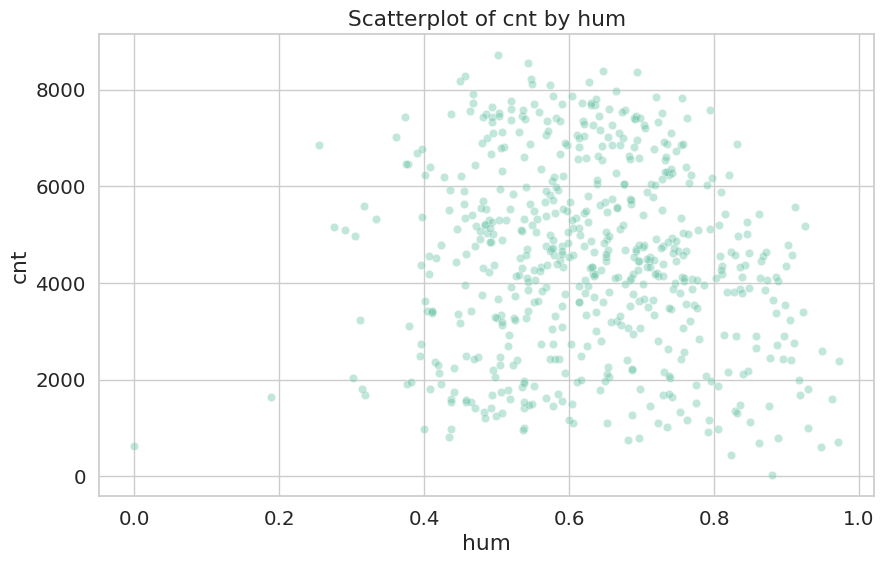

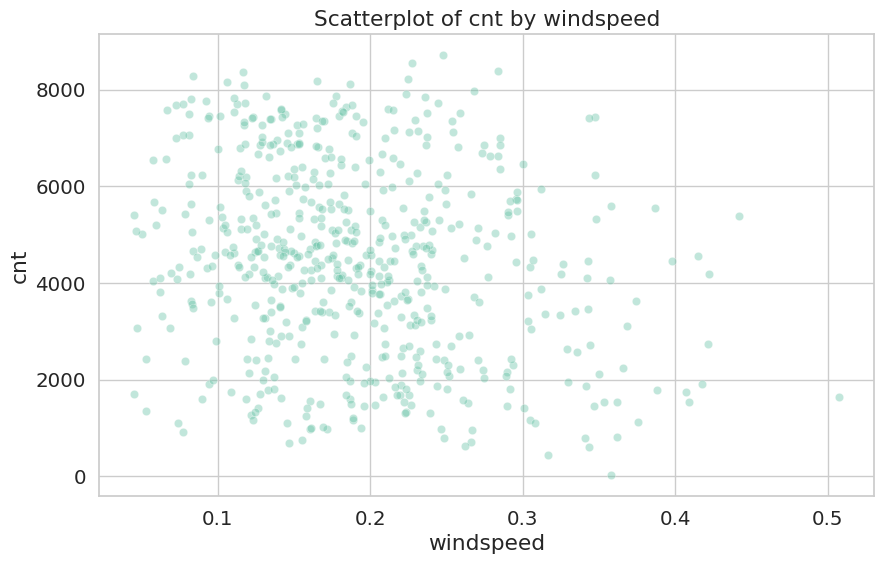

In [337]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

# Построение графиков для категориальных признаков
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='cnt', data=train_data)
    plt.title(f'Boxplot of cnt by {feature}')
    plt.show()

# Построение графиков для вещественных признаков
for feature in real_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='cnt', data=train_data, alpha=0.4)
    plt.title(f'Scatterplot of cnt by {feature}')
    plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
Рассмотрим выводы по графикам для каждого признака:

1. **season:**
   - Видно, что количество арендованных велосипедов зависит от времени года.
   - Зимой (season=1)  обычно происходит меньше аренды, чем летом (season=3), весной (season=3) и осенью (season=4).
   - Явные выбросы не наблюдаются только летом.

2. **mnth:**
   - Наблюдается схожая зависимость с временем года, что логично.
   - Наибольшее среднее значение и распределение величин наблюдается в сентябре (month=9), и с 5-го по 10 месяцы в среднем чаще арендовали велосипеды
   - В январе и феврале наименьшее значение
   - Выбросов нету

3. **holiday:**
   - Медиана больше в рабочий день, однако в выходной разброс значении меньше
   - Выбросов не выявлено.

4. **weekday:**
   - Видно, что аренда велосипедов имеет маленькие колебания в зависимости от дня недели.
   - Выбросов не наблюдается.

5. **workingday:**
   - Видно, что аренда велосипедов одинаковая в зависимости от того, является ли день рабочим или выходным.
   - Наличие работы не влияет на аренду велосипедов.

6. **weathersit:**
   - Более благоприятные погодные условия (weathersit=1) соответствуют более высоким значениям аренды.
   - В плохую погоду (weathersit=3) аренда снижается.
   - При weathersit=4 данных нету
   - Выбросов нет.

7. **temp и atemp:**
   - Температура и температура по ощущениям влияют на аренду велосипедов положительно. 
   - Зависимость кажется нелинейной, и рассмотрение квадратичной зависимости (x^2) может быть полезным.
   - Есть несколько выбросов при значениях меньше 0,1 и около 0,67

8. **hum:**
   - Влажность воздуха не является сильным предиктором, но можно заметить, что при высокой влажности значения аренды немного снижаются.

9. **windspeed:**
   - Скорость ветра не имеет явной зависимости с арендой велосипедов.
   - Не выявлено выбросов.

**Выводы:**
- Данные в целом чистые, без явных выбросов.
- Рассмотрение нелинейных зависимостей, таких как квадратичная зависимость (x^2), может быть полезным для температуры.


#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Преобразование вещественных признаков

In [338]:
def transform_numerical_features(data, real_features):
    for feature in real_features:
        if feature in ['temp', 'atemp']:
            data[feature+'_squared'] = data[feature] ** 2
    return data

train_data = transform_numerical_features(train_data, ['temp', 'atemp'])

**b).** Обработка выбросов

In [339]:
def handle_outliers(data, real_features):
    for feature in real_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

train_data = handle_outliers(train_data, real_features + ['temp_squared', 'atemp_squared'])

**c).** Преобразование категориальных признаков в нашем случае не требуется, так как они уже имеют числовые параметры

**d).** Масштабирование вещественных признаков:

In [340]:
from sklearn.preprocessing import StandardScaler

# Стандартизируем вещественные признаки
scaler = StandardScaler()
train_data[real_features + ['temp_squared', 'atemp_squared']] = scaler.fit_transform(train_data[real_features + ['temp_squared', 'atemp_squared']])


In [341]:
selected_categories = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'temp_squared', 'atemp_squared']
X_train = train_data[selected_categories]

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [342]:
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression(fit_intercept=True)  # Инициализируем и обучаем модель линейной регрессии
linear_reg_model.fit(X_train, train_data[target_feature])

coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': linear_reg_model.coef_})  # Выводим коэффициенты регрессии
intercept = linear_reg_model.intercept_

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)


Intercept: 3963.3650510165007

Coefficients:
          feature   coefficient
0          season    415.405966
1            mnth    -37.368223
2         holiday   -483.266970
3         weekday     52.665607
4      workingday    100.452039
5      weathersit   -330.161627
6            temp  10252.606279
7           atemp  -5983.462922
8             hum   -576.817567
9       windspeed   -388.451692
10   temp_squared  -8900.331134
11  atemp_squared   5653.506578


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [343]:
test_data = transform_numerical_features(test_data, ['temp', 'atemp'])  # предобработка данных тестового набора как для тренировочного ранее
test_data = handle_outliers(test_data, real_features + ['temp_squared', 'atemp_squared'])
test_data[real_features + ['temp_squared', 'atemp_squared']] = scaler.fit_transform(test_data[real_features + ['temp_squared', 'atemp_squared']])

In [344]:
X_test = test_data[selected_categories]  # выбираем только нужные нам категории

In [345]:
from sklearn.metrics import mean_absolute_error

y_pred = linear_reg_model.predict(X_test)  # Создание прогнозов на тестовой выборке

rmse = np.sqrt(mean_squared_error(test_data[target_feature], y_pred))  # RMSE

mae = mean_absolute_error(test_data[target_feature], y_pred)  # MAE

mape = np.mean(np.abs((test_data[target_feature] - y_pred) / test_data[target_feature])) * 100  # MAPE

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')



RMSE: 1258.36
MAE: 1071.80
MAPE: 28.22%


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [346]:
def estimate_coefficients(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Добавляем константный признак
    
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # Рассчитываем оценку коэффициентов с использованием формулы нормального уравнения
    
    return beta_hat

coefficients = estimate_coefficients(X_train, train_data[target_feature])

print("Оценка коэффициентов:", coefficients)

Оценка коэффициентов: [ 3963.36505102   415.40596606   -37.36822302  -483.26696996
    52.6656071    100.45203923  -330.16162724 10252.60627904
 -5983.46292162  -576.81756686  -388.45169236 -8900.33113408
  5653.50657842]


При использовании этой формулы, необходимо удостовериться, что матрица \(X^T X\) обратима (невырожденная). Если матрица необратима, это может привести к проблеме вычислений и усложнить интерпретацию результатов.

К примеру, если у нас есть линейная зависимость между некоторыми признаками, то матрица \(X^T X\) может стать вырожденной, и ее нельзя будет обратить. Это называется проблемой мультиколлинеарности.

можно решить эту проблему, убрав избыточные признаки, и затем использоуем формулу для оценки коэффициентов. После этого, мы сможем оценить качество модели на тестовых данных.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [347]:
meaningful_features = ['season', 'mnth', 'holiday', 'weathersit', 'temp_squared', 'atemp_squared', 'temp', 'atemp']  # выбираем нужные нам признаки
X_train_selected = X_train[meaningful_features]

X_train_with_const = np.column_stack((np.ones(len(X_train_selected)), X_train_selected))  # Добавим константный столбец к признакам

beta_ols = np.linalg.lstsq(X_train_with_const, train_data[target_feature], rcond=None)[0]  # Используем метод наименьших квадратов для оценки коэффициентов

print("Intercept (const):", beta_ols[0])  # Выведем оценки коэффициентов
print("Coefficients:", beta_ols[1:])

Intercept (const): 5115.105280038899
Coefficients: [  460.18338384   -51.29697646  -649.2509587  -1008.04129953
 -4243.90361637  1490.45459088  5429.78985215 -1696.46373038]


Тестируем качество метода на тестовом наборе

In [348]:
X_test_selected= X_test[meaningful_features]

X_test_with_const = np.column_stack((np.ones(len(X_test_selected)), X_test_selected))  # Добавим константный столбец к признакам в тестовом наборе

y_pred_ols = X_test_with_const @ beta_ols  # Сделаем предсказание на тестовой выборке

rmse_ols = np.sqrt(mean_squared_error(test_data[target_feature], y_pred_ols))  # Вычислим ошибку предсказания
mae_ols = np.abs(test_data[target_feature] - y_pred_ols).mean()
mape_ols = np.mean(np.abs((test_data[target_feature] - y_pred_ols) / test_data[target_feature])) * 100

print(f'RMSE: {rmse_ols:.2f}')  # Выведем ошибку предсказания
print(f'MAE: {mae_ols:.2f}')
print(f'MAPE: {mape_ols:.2f}%')


RMSE: 1294.53
MAE: 1130.43
MAPE: 31.44%


Сделайте выводы.

**Выводы:** Эксперимент показал, что МНК и метод с линейной зависимостью в оценках RMSE, MAE, MAPE дают примерно схожие результаты. Можно заметить, что при правильной обработке данных и зависимостях между ними, можно увеличить точность МНК. Для признаков которые имеют слабую зависимость с целевым признаком стоит рассмотреть другой вид зависимости кроме линейной, и нельзя их не учитывать совсем, ведь в таком случае качество ухудшается.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

решение будет на листке в формате jpg или pdf

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

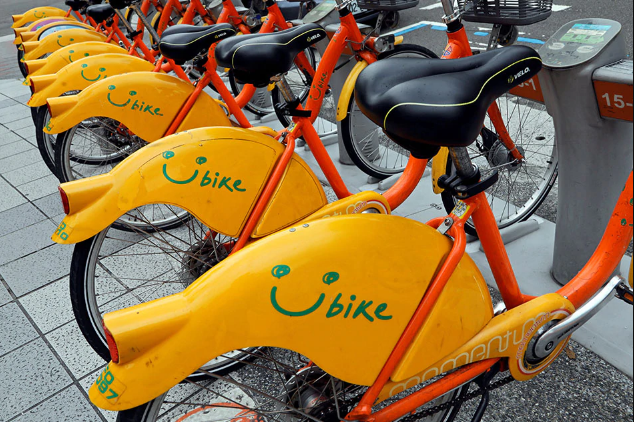

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [349]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.coef_ = None
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        n, d = X.shape
        
        if self.fit_intercept:
            X = np.c_[np.ones(n), X]  # добавляем константный признак
        
        # Явная формула ridge-регрессии
        A = X.T @ X + self.lambd * np.eye(d + 1 if self.fit_intercept else d)
        b = X.T @ Y
        self.coef_ = np.linalg.inv(A) @ b
        
        
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # добавляем константный признак
        
        predictions = X @ self.coef_
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [350]:
X = data.drop('cnt', axis=1)  # Определение признаков и целевой переменной
y = data['cnt']

train_set, temp_set = train_test_split(data, test_size=0.4, random_state=11)  # Разделение данных
val_set, test_set= train_test_split(temp_set, test_size=0.5, random_state=13)
print("Размеры обучающей выборки:", train_set.shape)
print("Размеры валидационной выборки:", val_set.shape)
print("Размеры тестовой выборки:", test_set.shape)

Размеры обучающей выборки: (438, 16)
Размеры валидационной выборки: (146, 16)
Размеры тестовой выборки: (147, 16)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [351]:
train_set = transform_numerical_features(train_set, ['temp', 'atemp'])  # предобработка данных тестового набора как для тренировочного ранее
train_set = handle_outliers(train_set, real_features + ['temp_squared', 'atemp_squared'])

scaler = StandardScaler()  # Стандартизация вещественных признаков
train_set[real_features + ['temp_squared', 'atemp_squared']] = scaler.fit_transform(train_set[real_features + ['temp_squared', 'atemp_squared']])

selected_categories = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'temp_squared', 'atemp_squared', 'cnt']
train_set_selected = train_set[selected_categories]


In [352]:
y_train_2 = train_set_selected['cnt']
X_train_selected_2 = train_set_selected.drop('cnt', axis=1)


Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Оптимальное значение гиперпараметра λ: 0.001


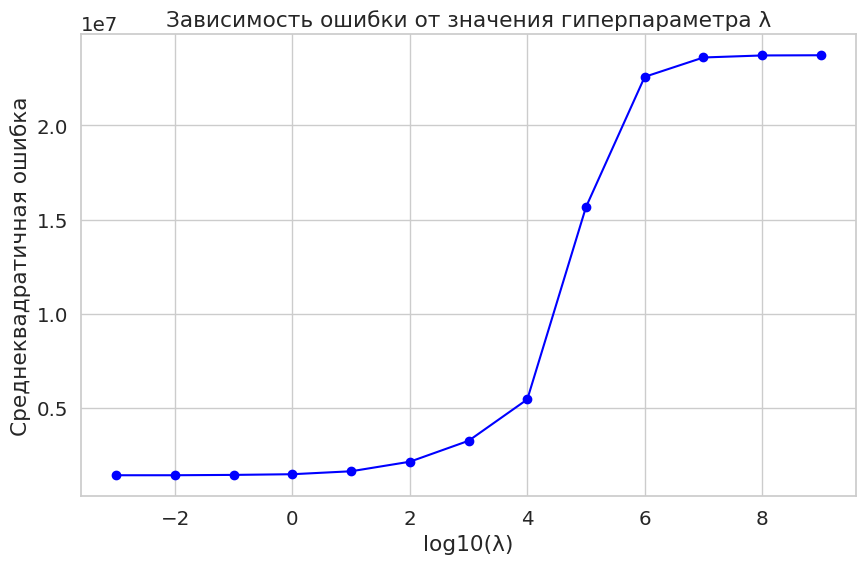

In [353]:
alphas = np.logspace(-3, 9, 13)  # диапазон значений alpha (λ) в логарифмической шкале

cv_errors = []  # пустой список для сохранения ошибок перекрестной проверки

for alpha in alphas:
    ridge_model = RidgeRegression(lambd=alpha)  # Инициализирую и обучаю модель RidgeRegression для текущего alpha
    ridge_model.fit(X_train_selected_2, y_train_2)
    
    # Рассчитайте ошибку перекрестной проверки (например, среднеквадратичную ошибку)
    predictions = ridge_model.predict(X_train_selected_2)  # Вам, возможно, придется адаптировать это к вашему классу RidgeRegression
    mse = mean_squared_error(y_train_2, predictions)
    cv_errors.append(mse)

# Найдите индекс минимальной ошибки перекрестной проверки
optimal_alpha_index = np.argmin(cv_errors)
optimal_alpha = alphas[optimal_alpha_index]

# Выведите оптимальное значение гиперпараметра lambda
print(f"Оптимальное значение гиперпараметра λ: {optimal_alpha}")

# Постройте график значений гиперпараметра lambda и их ошибок перекрестной проверки
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), cv_errors, marker='o', linestyle='-', color='b')
plt.xlabel('log10(λ)')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Зависимость ошибки от значения гиперпараметра λ')
plt.show()


Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [354]:
val_set = transform_numerical_features(val_set, ['temp', 'atemp'])  # предобработка данных тестового набора как для тренировочного ранее
val_set = handle_outliers(val_set, real_features + ['temp_squared', 'atemp_squared'])

# Стандартизация вещественных признаков
val_set[real_features + ['temp_squared', 'atemp_squared']] = scaler.fit_transform(val_set[real_features + ['temp_squared', 'atemp_squared']])
val_set_selected = val_set[selected_categories]

In [355]:
y_val = val_set_selected['cnt']
X_valid_selected_2 = val_set_selected.drop('cnt', axis=1)

In [356]:
train_rmse_list, train_mae_list, train_mape_list = [], [], []  # пустые списки для сохранения метрик
valid_rmse_list, valid_mae_list, valid_mape_list = [], [], []

for alpha in alphas:  # Перебор каждого значение alpha
    ridge_model = RidgeRegression(lambd=alpha)  # Обучение модель RidgeRegression для текущего alpha
    ridge_model.fit(X_train_selected_2, y_train_2)
    
    train_predictions = ridge_model.predict(X_train_selected_2)  # Рассчёт предсказания для обучающей и валидационной выборок
    valid_predictions = ridge_model.predict(X_valid_selected_2)

    train_rmse = np.sqrt(mean_squared_error(y_train_2, train_predictions))  # Оценка метрик на обучающей выборке
    train_mae = mean_absolute_error(y_train_2, train_predictions)
    train_mape = np.mean(np.abs((y_train_2 - train_predictions) / y_train_2)) * 100 
    
    valid_rmse = np.sqrt(mean_squared_error(y_val, valid_predictions))  # Оценка метрик на валидационной выборке
    valid_mae = mean_absolute_error(y_val, valid_predictions)
    valid_mape = np.mean(np.abs((y_val - valid_predictions) / y_val)) * 100 
    
    train_rmse_list.append(train_rmse)  # Сохранение метрик в списки
    train_mae_list.append(train_mae)
    train_mape_list.append(train_mape)
    
    valid_rmse_list.append(valid_rmse)
    valid_mae_list.append(valid_mae)
    valid_mape_list.append(valid_mape)

# Вывод метрики для каждого значения гиперпараметра lambda
for i, alpha in enumerate(alphas):
    print(f"Гиперпараметр λ: {alpha}")
    print(f"Train RMSE: {train_rmse_list[i]}, Train MAE: {train_mae_list[i]}, Train MAPE: {train_mape_list[i]}%")
    print(f"Validation RMSE: {valid_rmse_list[i]}, Validation MAE: {valid_mae_list[i]}, Validation MAPE: {valid_mape_list[i]}%\n")


Гиперпараметр λ: 0.001
Train RMSE: 1195.027669349978, Train MAE: 1017.2808225332763, Train MAPE: 56.0428053138903%
Validation RMSE: 1253.3329293688284, Validation MAE: 1064.4637641909221, Validation MAPE: 25.20987227759276%

Гиперпараметр λ: 0.01
Train RMSE: 1195.3491077455471, Train MAE: 1017.5027984507348, Train MAPE: 56.39105351174959%
Validation RMSE: 1245.7567575635208, Validation MAE: 1060.3508817648592, Validation MAPE: 25.062406079107014%

Гиперпараметр λ: 0.1
Train RMSE: 1202.8022428931752, Train MAE: 1023.3229171042345, Train MAPE: 58.14602989599661%
Validation RMSE: 1225.3731210955352, Validation MAE: 1046.5600463016503, Validation MAPE: 24.602330643042972%

Гиперпараметр λ: 1.0
Train RMSE: 1217.795680925783, Train MAE: 1035.5713921951815, Train MAPE: 60.53378109513689%
Validation RMSE: 1237.804655304835, Validation MAE: 1050.8449250040871, Validation MAPE: 24.434511121449642%

Гиперпараметр λ: 10.0
Train RMSE: 1280.4825667088949, Train MAE: 1068.4284314191052, Train MAPE: 6

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

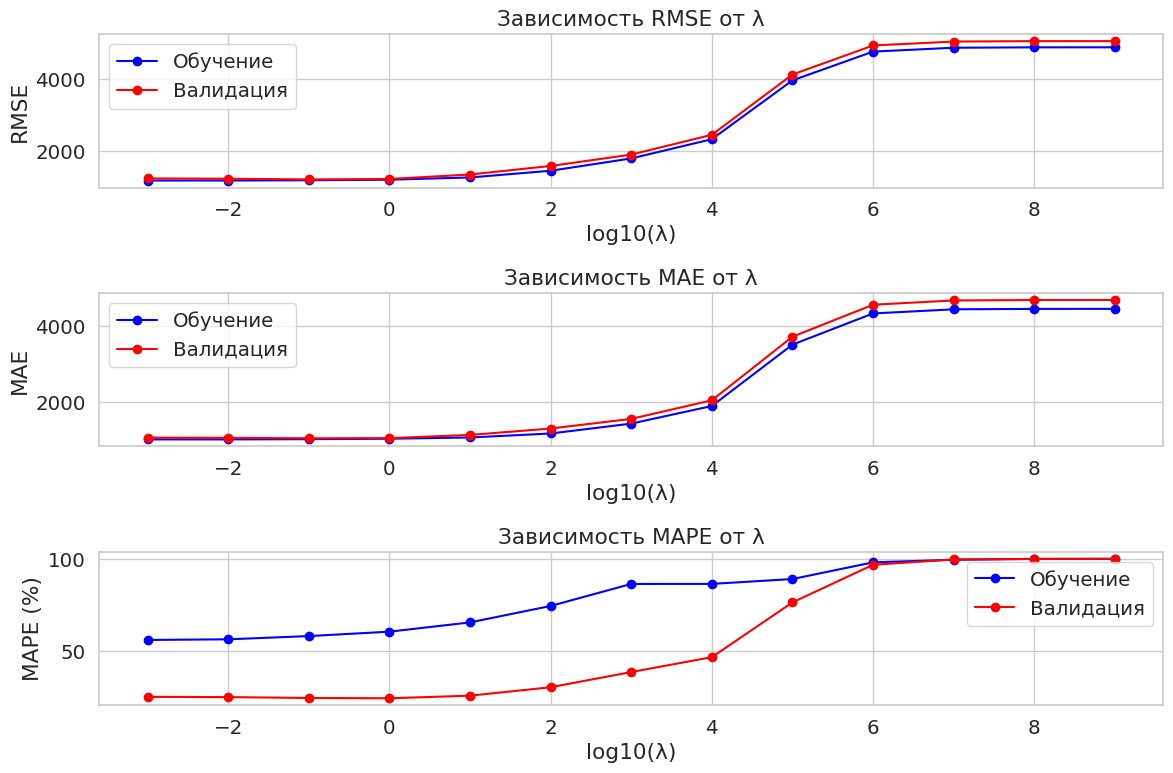

In [357]:
# Постройте графики для каждой метрики
plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(3, 1, 1)
plt.plot(np.log10(alphas), train_rmse_list, label='Обучение', marker='o', linestyle='-', color='b')
plt.plot(np.log10(alphas), valid_rmse_list, label='Валидация', marker='o', linestyle='-', color='r')
plt.xlabel('log10(λ)')
plt.ylabel('RMSE')
plt.legend()
plt.title('Зависимость RMSE от λ')

# MAE
plt.subplot(3, 1, 2)
plt.plot(np.log10(alphas), train_mae_list, label='Обучение', marker='o', linestyle='-', color='b')
plt.plot(np.log10(alphas), valid_mae_list, label='Валидация', marker='o', linestyle='-', color='r')
plt.xlabel('log10(λ)')
plt.ylabel('MAE')
plt.legend()
plt.title('Зависимость MAE от λ')

# MAPE
plt.subplot(3, 1, 3)
plt.plot(np.log10(alphas), train_mape_list, label='Обучение', marker='o', linestyle='-', color='b')
plt.plot(np.log10(alphas), valid_mape_list, label='Валидация', marker='o', linestyle='-', color='r')
plt.xlabel('log10(λ)')
plt.ylabel('MAPE (%)')
plt.legend()
plt.title('Зависимость MAPE от λ')

plt.tight_layout()
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

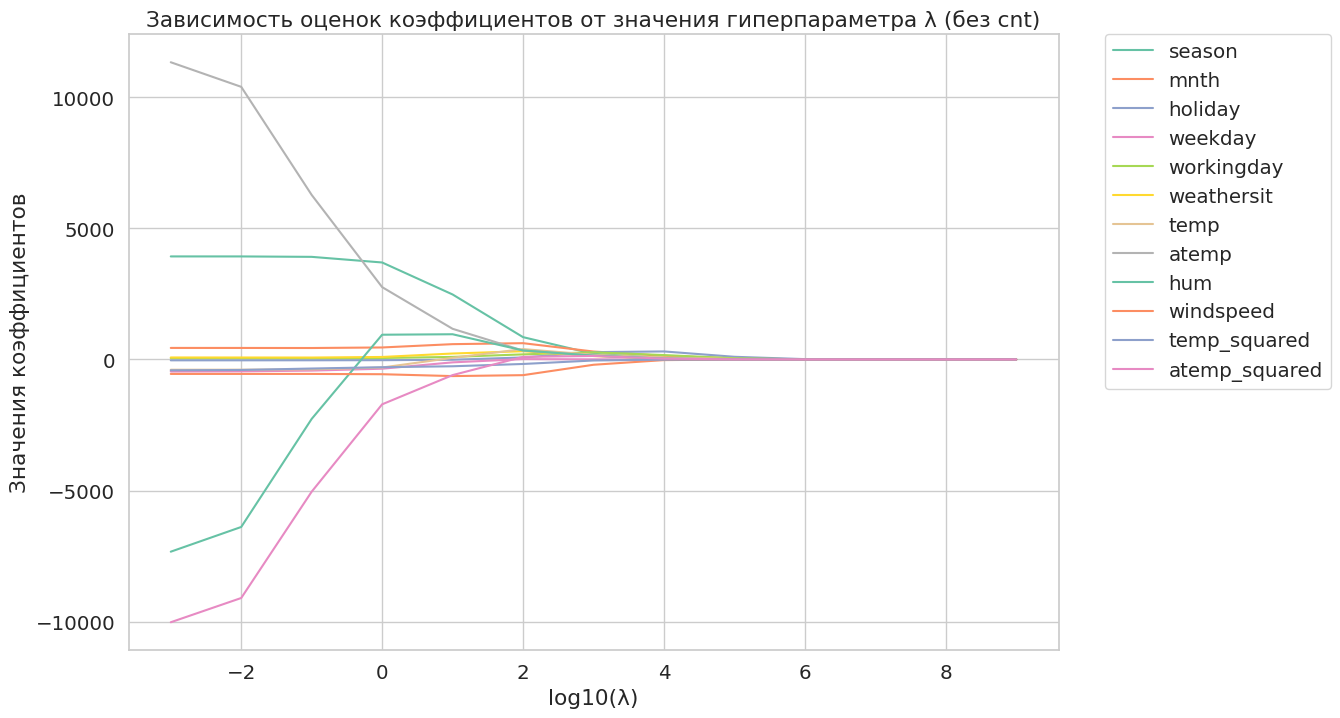

In [358]:
plt.figure(figsize=(12, 8))

for feature_idx, feature_name in enumerate(selected_categories[:-1]):  # Исключаем последний признак cnt
    coef_values = []  # Здесь будут храниться значения коэффициентов для текущего признака
    
    for alpha in alphas:  # Итерируемся по значениям гиперпараметра
        ridge_model = RidgeRegression(lambd=alpha)  # Инициализируем и обучаем RidgeRegression модель
        ridge_model.fit(X_train_selected_2, y_train_2)
        
        coef_values.append(ridge_model.coef_[feature_idx])  # Сохраняем значение текущего коэффициента
    
    plt.plot(np.log10(alphas), coef_values, label=f'{feature_name}')  # Строим кривую для текущего признака

plt.xlabel('log10(λ)')
plt.ylabel('Значения коэффициентов')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Зависимость оценок коэффициентов от значения гиперпараметра λ (без cnt)')
plt.show()


Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [359]:
test_set = transform_numerical_features(test_set, ['temp', 'atemp'])  # предобработка данных тестового набора как для тренировочного ранее
test_set = handle_outliers(test_set, real_features + ['temp_squared', 'atemp_squared'])

# Стандартизация вещественных признаков
test_set[real_features + ['temp_squared', 'atemp_squared']] = scaler.fit_transform(test_set[real_features + ['temp_squared', 'atemp_squared']])
test_set_selected = test_set[selected_categories]

In [360]:
y_test_2 = test_set_selected['cnt']
X_test_selected_2 = test_set_selected.drop('cnt', axis=1)

In [361]:
optimal_index = np.argmin(valid_mape_list)  # Используем оптимальное значение гиперпараметра
optimal_alpha_from_valid = alphas[optimal_index]

ridge_model_optimal = RidgeRegression(lambd=optimal_alpha_from_valid)  # Инициализируем и обучаем RidgeRegression модель на обучающей выборке с оптимальным параметром
ridge_model_optimal.fit(X_train_selected_2, y_train_2)

predictions_test = ridge_model_optimal.predict(X_test_selected_2)  # Предсказываем значения на тестовой выборке

rmse_test = np.sqrt(mean_squared_error(y_test_2, predictions_test))  # Считаем ошибку на тестовой выборке
mae_test = mean_absolute_error(y_test_2, predictions_test)
mape_test = np.mean(np.abs((y_test_2 - predictions_test) / y_test_2)) * 100 

print(f'Ошибки на тестовой выборке:')
print(f'RMSE: {rmse_test:.2f}')
print(f'MAE: {mae_test:.2f}')
print(f'MAPE: {mape_test:.2f}%')


Ошибки на тестовой выборке:
RMSE: 1254.35
MAE: 1076.20
MAPE: 31.82%


**Выводы:** Данная часть исследования показала, что для модели ridge-регрессии надо важно произвести стандартизацию признаков перед обучением, так как без стандартизации гиперпараметр может учитывать их "нечестно". Важно ещё при обучении выбрать оптимальное значение гиперпараметра для дальнейшего использования и в таком случае удобно рассматривать значения под логарифмом, что поможет рассмотреть наибольший диапозон.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

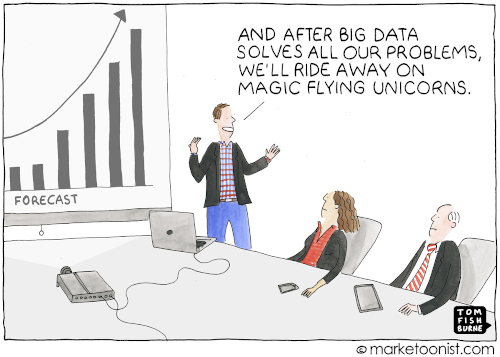

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [362]:
# Начальное приближение оценок коэффициентов
initial_coefficients = np.zeros(X_train_selected_2.shape[1])

# Инициализация и обучение RidgeRegression модели с начальными оценками
ridge_model_initial = RidgeRegression(lambd=optimal_alpha_from_valid)
ridge_model_initial.coef_ = initial_coefficients  # Устанавливаем начальные оценки коэффициентов
ridge_model_initial.fit(X_train_selected_2, y_train_2)


Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [363]:
class RidgeSGDRegression:
    def __init__(self, lambd=0.1, learning_rate=0.01, batch_size=128, max_iter=1000, tol=1e-4):
        '''
        Инициализация модели стохастического градиентного спуска для Ridge-регрессии.
        
        Аргументы:
        lambd -- параметр регуляризации.
        learning_rate -- скорость обучения (шаг градиентного спуска).
        batch_size -- размер батча.
        max_iter -- максимальное количество итераций.
        tol -- порог сходимости, при котором процесс обучения останавливается.
        '''
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.rmse_history = []  # Инициализация пустого списка для сохранения значений RMSE
        self.mae_history = []   # Инициализация пустого списка для сохранения значений MAE
        self.mape_history = []  # Инициализация пустого списка для сохранения значений MAPE
    
    def fit(self, X, y):
        n, d = X.shape
        X = np.c_[np.ones(n), X]  # добавляем константный признак
        self.coef_ = np.zeros(d + 1)
        
        for _ in range(self.max_iter):
            # Перемешиваем данные
            indices = np.random.permutation(n)
            X_shuffled, y_shuffled = X[indices], y[indices]
            
            # Разбиваем данные на батчи
            for batch_start in range(0, n, self.batch_size):
                batch_end = batch_start + self.batch_size
                X_batch, y_batch = X_shuffled[batch_start:batch_end], y_shuffled[batch_start:batch_end]
                
                # Вычисляем градиент
                gradient = -2 * X_batch.T @ (y_batch - X_batch @ self.coef_) / len(y_batch) + 2 * self.lambd * self.coef_
                
                # Обновляем веса
                self.coef_ -= self.learning_rate * gradient
                
                # Вычисляем и сохраняем метрики
                predictions = X @ self.coef_
                rmse = np.sqrt(mean_squared_error(y, predictions))
                mae = mean_absolute_error(y, predictions)
                mape = np.mean(np.abs((y - predictions) / y)) * 100 
                self.rmse_history.append(rmse)
                self.mae_history.append(mae)
                self.mape_history.append(mape)
                
            # Проверяем условие сходимости
            if np.linalg.norm(gradient) < self.tol:
                break
        
        return self
    
    def predict(self, X):
        if self.coef_ is None:
            raise ValueError("Модель еще не обучена. Сначала вызовите метод fit.")
        
        X = np.c_[np.ones(X.shape[0]), X]  # добавляем константный признак
        predictions = X @ self.coef_
        return predictions


Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [364]:
# Инициализация модели
ridge_sgd_model = RidgeSGDRegression(lambd=optimal_alpha_from_valid, learning_rate=0.01, batch_size=128, max_iter=1000, tol=1e-4)

X_train_selected_2_reset_idx = X_train_selected_2.reset_index(drop=True)
y_train_2_reset_idx = y_train_2.reset_index(drop=True)
# Обучение модели
ridge_sgd_model.fit(X_train_selected_2_reset_idx, y_train_2_reset_idx)

# Получение предсказаний для обучающей и валидационной выборок
train_predictions = ridge_sgd_model.predict(X_train_selected_2)
val_predictions = ridge_sgd_model.predict(X_valid_selected_2)

# Вычисление метрик RMSE, MAE, MAPE для обучающей и валидационной выборок
train_rmse = np.sqrt(mean_squared_error(y_train_2, train_predictions))
train_mae = mean_absolute_error(y_train_2, train_predictions)
train_mape = np.mean(np.abs((y_train_2 - train_predictions) / y_train_2)) * 100 

val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
val_mae = mean_absolute_error(y_val, val_predictions)
val_mape = np.mean(np.abs((y_val - val_predictions) / y_val)) * 100 

# Вывод результатов
print(f"Train RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, MAPE: {train_mape:.2f}%")
print(f"Validation RMSE: {val_rmse:.2f}, MAE: {val_mae:.2f}, MAPE: {val_mape:.2f}%")



Train RMSE: 1699.97, MAE: 1335.73, MAPE: 76.23%
Validation RMSE: 1845.78, MAE: 1503.99, MAPE: 34.10%


**Графики**

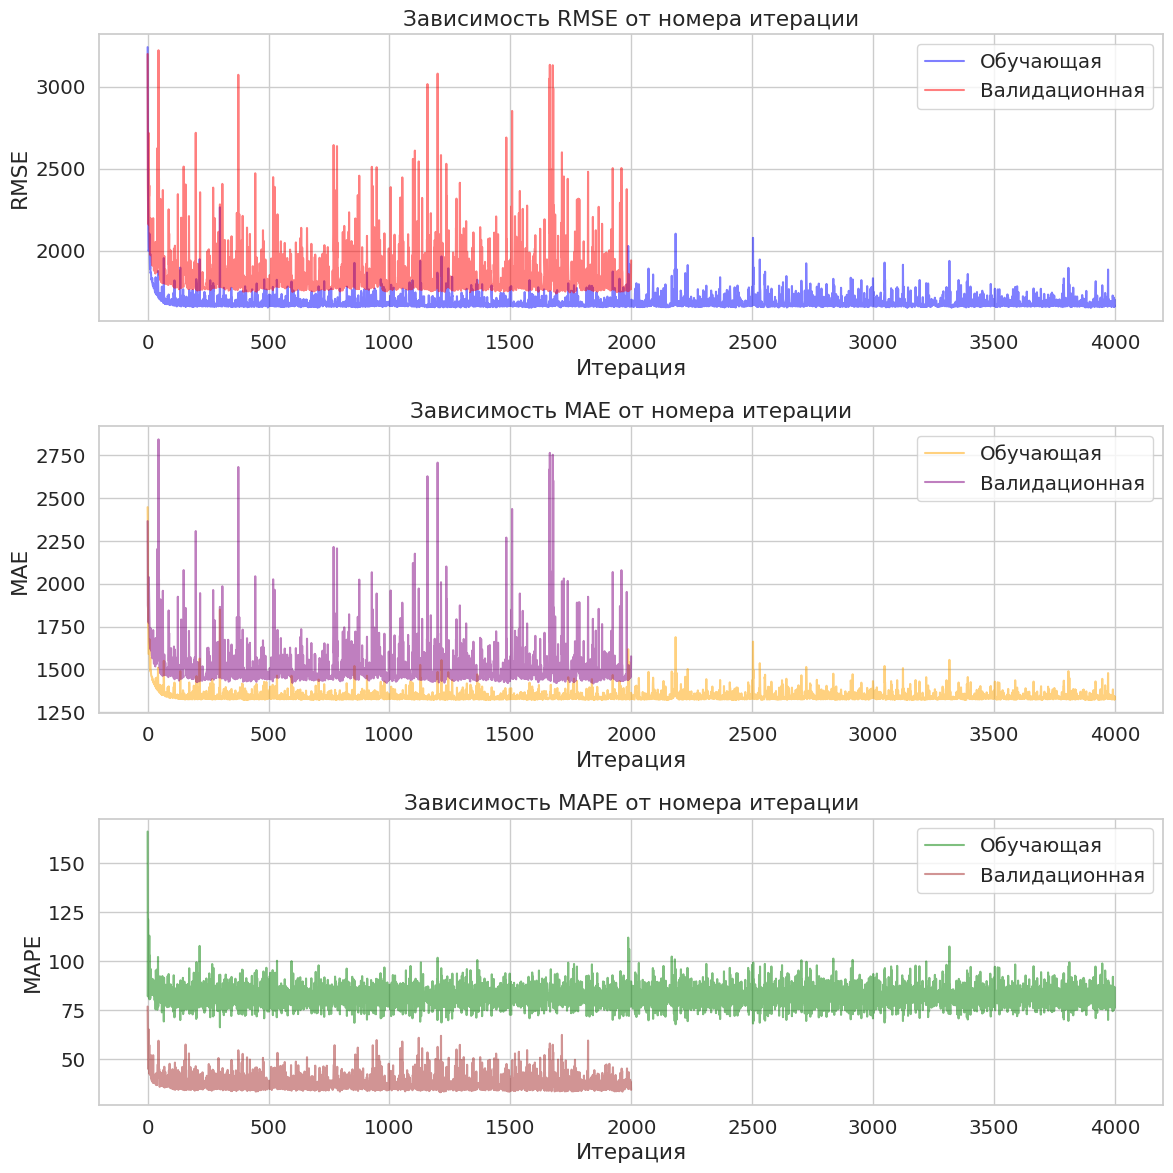

Количество совершенных итераций: 4000


In [365]:
# Для истории итерации валидационного набора
ridge_sgd_val_model = RidgeSGDRegression(lambd=optimal_alpha_from_valid, learning_rate=0.01, batch_size=128, max_iter=1000, tol=1e-4)
X_val_reset_ind = X_valid_selected_2.reset_index(drop=True)
y_val_reset_ind = y_val.reset_index(drop=True)
ridge_sgd_val_model.fit(X_val_reset_ind, y_val_reset_ind)


# Построение графиков
plt.figure(figsize=(12, 12))

# График RMSE
plt.subplot(3, 1, 1)
plt.plot(range(len(ridge_sgd_model.rmse_history)), ridge_sgd_model.rmse_history, label='Обучающая', color='blue', alpha = 0.5)
plt.plot(range(len(ridge_sgd_val_model.rmse_history)), ridge_sgd_val_model.rmse_history, label='Валидационная', color='red', alpha = 0.5)
plt.xlabel('Итерация')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от номера итерации')
plt.legend()

# График MAE
plt.subplot(3, 1, 2)
plt.plot(range(len(ridge_sgd_model.mae_history)), ridge_sgd_model.mae_history, label='Обучающая', color='orange', alpha = 0.5)
plt.plot(range(len(ridge_sgd_val_model.mae_history)), ridge_sgd_val_model.mae_history, label='Валидационная', color='purple', alpha = 0.5)
plt.xlabel('Итерация')
plt.ylabel('MAE')
plt.title('Зависимость MAE от номера итерации')
plt.legend()

# График MAPE
plt.subplot(3, 1, 3)
plt.plot(range(len(ridge_sgd_model.mape_history)), ridge_sgd_model.mape_history, label='Обучающая', color='green', alpha = 0.5)
plt.plot(range(len(ridge_sgd_val_model.mape_history)), ridge_sgd_val_model.mape_history, label='Валидационная', color='brown', alpha = 0.5)
plt.xlabel('Итерация')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от номера итерации')
plt.legend()

plt.tight_layout()
plt.show()

# Определение количества итераций
num_iterations = len(ridge_sgd_model.rmse_history)
print(f'Количество совершенных итераций: {num_iterations}')


Посчитайте ошибку на тестовой выборке.

In [366]:
test_predictions = ridge_sgd_model.predict(X_test_selected_2)
# Расчет метрик
test_rmse = np.sqrt(mean_squared_error(y_test_2, test_predictions))
test_mae = mean_absolute_error(y_test_2, test_predictions)
test_mape = np.mean(np.abs((y_test_2 - test_predictions) / y_test_2)) * 100 

# Вывод результатов
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")


Test RMSE: 1884.8691962055063
Test MAE: 1534.71707504524
Test MAPE: 45.78293858787876


**Вывод:** Эксперимент показал, что на каждой итерации значения оценок приблизительно в одном диапозоне, однако иногда могут быть выбросы из-за чего на итерации значение сильно отличается от остальной массы. Также этот метод показал качество хуже чем было у линейной регрессии и МНК. Это может быть связано из-за неправильно обработанной зависимости или в неправильном выборе гиперпараметра